## 1.- Importar librerías

In [248]:
import os, glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
os.listdir()
"vamo"

['2005', '2008', '2013', '2016', 'agrupados', 'INEM.ipynb']

## 2.- Obtener archivos

In [120]:
files_total_ent = glob.glob('agrupados/total_estatal/*.csv')
files_total_mun = glob.glob('agrupados/total_mun/*.csv')
files_fuentes_ent = glob.glob('agrupados/fuentes_gral/*_ent/*.csv')
files_fuentes_mun = glob.glob('agrupados/fuentes_gral/*_mun/*.csv')
file_fuentes_ent = glob.glob('agrupados/fuentes_gral/*.csv')
file_fuentes_ent

['agrupados/fuentes_gral\\INEM-2005-Fuente-entidades.csv']

In [237]:
renameCols = {
    "Entidad Fed.":"nom_ent",
    "ESTADO":"nom_ent",
    "ESTADO":"nom_ent",
    "cve.edo.":"cve_ent",
    "cvemun":"cve_mun",
    "cveedo":"cve_ent",
    "cveestado":"cve_ent",
    "cvemunicipio":"cve_mun",
    "estado":"nom_ent",
    "cvedeestado":"cve_ent",
    "municipio":"nom_mun",
    "cvedemunicipio":"cve_mun",
    "pm25":"pm2.5",
    "año":"year",
    "Añño":"year",
    "entidadfed.":"nom_ent",
    'municipioodeleg.': 'nom_mun',
}

emisiones = ['pm10', 'pm2.5',  'co', 'nox', 'cov', 'nh3','so2']

In [301]:
def readAppendSectoresFiles(files):
  df = pd.DataFrame()
  
  for f in files:
    
    try:
      dfi = pd.read_csv(f)
      
    except UnicodeDecodeError:
      dfi = pd.read_csv(f, encoding="latin1") 
      
    fuente = f.split("-")[3]
    year = f.split("-")[1]
    dfi["fuente"] = fuente
    dfi["year"] = year
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    
    dfi.rename(columns=renameCols, inplace=True)
    df = pd.concat([df, dfi])
    
    
  # make columns emisiones to float64
  for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
    #dfi[e] = dfi[e].str.replace(",", "")
    df[e] = df[e].astype("float64")
    
    
  return df

#colStateTotal = ['nom_ent', 'year', 'pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']
def readAppendTotalFiles(files):
  df = pd.DataFrame()

  for f in files:
    
    year = f.split("-")[1]
    tipo = f.split("-")[-1]
    
    try:
      
      dfi = pd.read_csv(f)
      
    except:
      
      dfi = pd.read_csv(f, encoding="latin1", skipfooter=3) 
      
    # keep only first 32 rows
    #dfi = dfi.iloc[:32]
       
    # if year = "2005", remove "Municipio" column
    if year == "2005" and tipo ==  "municipal.csv":
      dfi.drop(columns=["Municipio"], inplace=True)   
    
    ## remove empty spaces in column names
    dfi.columns = dfi.columns.str.replace(" ", "")
    
    ## lowercase column names
    dfi.columns = dfi.columns.str.lower()
    dfi.rename(columns=renameCols, inplace=True)
  
    dfi["year"] = year
    

    
 
    for e in ['pm10', 'pm2.5','so2', 'co', 'nox', 'cov', 'nh3']:
      # check if column is type string
      if dfi[e].dtype != "object":
        continue
      
      # remove "," in values
      dfi[e] = dfi[e].str.replace(",", "")
        
      dfi[e] = dfi[e].astype("float64")

    #dfi = dfi[colStateTotal]
    df = pd.concat([df, dfi])
    
  return df



## Fuentes estatal municipal

In [239]:
fuentes_entidad_2005 = pd.read_csv(file_fuentes_ent[0])
## remove empty spaces in column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.replace(" ", "")
    
## lowercase column names
fuentes_entidad_2005.columns = fuentes_entidad_2005.columns.str.lower()
fuentes_entidad_2005.rename(columns=renameCols, inplace=True)
# make columns emisiones to float64
for e in ['pm10', 'pm2.5', 'so2', 'co', 'nox', 'cov', 'nh3']:
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].str.replace(",", "")
  fuentes_entidad_2005[e] = fuentes_entidad_2005[e].astype("float64")
  
fuentes_entidad_2005.head()

,year,fuente,cve_ent,nom_ent,pm10,pm2.5,so2,co,nox,cov,nh3
0,2005,AREA,1.0,AGUASCALIENTES,4159.26,2921.86,4184.56,20816.05,3477.93,19337.84,20899.68
1,2005,AREA,2.0,BAJA CALIFORNIA,11663.15,8612.71,16784.09,75208.42,12350.39,52375.69,12162.86
2,2005,AREA,3.0,BAJA CALIFORNIA SUR,4024.20,3034.90,1793.27,22071.83,2698.27,11472.82,3215.62
3,2005,AREA,4.0,CAMPECHE,6654.25,4873.10,1992.62,36258.78,3559.64,15777.77,10900.75
4,2005,AREA,5.0,COAHUILA,9489.41,6094.22,13293.27,38034.03,12457.83,46581.64,18073.55


In [240]:
fuentes_ent = readAppendSectoresFiles(files_fuentes_ent)
fuentes_ent = pd.concat([ fuentes_entidad_2005, fuentes_ent])
fuentes_ent = pd.melt(fuentes_ent, id_vars=["nom_ent", "cve_ent", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")

fuentes_mun = readAppendSectoresFiles(files_fuentes_mun)
fuentes_mun = pd.melt(fuentes_mun, id_vars=["nom_ent", "cve_ent", "nom_mun", "cve_mun", "fuente", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
fuentes_ent.head()

,nom_ent,cve_ent,fuente,year,emision,emisiones
0,AGUASCALIENTES,1.0,AREA,2005,pm10,4159.26
1,BAJA CALIFORNIA,2.0,AREA,2005,pm10,11663.15
2,BAJA CALIFORNIA SUR,3.0,AREA,2005,pm10,4024.20
3,CAMPECHE,4.0,AREA,2005,pm10,6654.25
4,COAHUILA,5.0,AREA,2005,pm10,9489.41


In [241]:
fuentes_mun.head()

,nom_ent,cve_ent,nom_mun,cve_mun,fuente,year,emision,emisiones
0,Aguascalientes,1,Aguascalientes,1.0,area,2008,pm10,1154.287483
1,Aguascalientes,1,Asientos,2.0,area,2008,pm10,261.230143
2,Aguascalientes,1,Calvillo,3.0,area,2008,pm10,268.989001
3,Aguascalientes,1,Cosio,4.0,area,2008,pm10,92.818156
4,Aguascalientes,1,Jesus Maria,5.0,area,2008,pm10,431.452577


## Total estatal municipal

In [277]:
files_total_ent

['agrupados/total_estatal\\INEM-2005-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2008-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2013-Total-estatal.csv',
 'agrupados/total_estatal\\INEM-2016-Total-estatal.csv']

In [305]:
total_ent = readAppendTotalFiles(files_total_ent)
total_ent = pd.melt(total_ent, id_vars=["nom_ent",  "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")

total_mun = readAppendTotalFiles(files_total_mun)
print(total_mun.columns)
total_mun = pd.melt(total_mun, id_vars=["nom_ent", "nom_mun", "year"], value_vars=emisiones, var_name="emision", value_name="emisiones")
total_ent

Index(['year', 'cve_ent', 'nom_ent', 'nom_mun', 'pm10', 'pm2.5', 'so2', 'co',
       'nox', 'cov', 'nh3', 'cve_mun'],
      dtype='object')


C:\Users\pedro\AppData\Local\Temp\ipykernel_1476\489829757.py:50: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dfi = pd.read_csv(f, encoding="latin1", skipfooter=3)
C:\Users\pedro\AppData\Local\Temp\ipykernel_1476\489829757.py:50: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dfi = pd.read_csv(f, encoding="latin1", skipfooter=3)


,nom_ent,year,emision,emisiones
0,AGUASCALIENTES,2005,pm10,5371.110000
1,BAJA CALIFORNIA,2005,pm10,15182.240000
2,BAJA CALIFORNIA SUR,2005,pm10,7098.980000
3,CAMPECHE,2005,pm10,9436.440000
4,COAHUILA,2005,pm10,32337.540000
...,...,...,...,...
961,Tamaulipas,2016,so2,123455.567100
962,Tlaxcala,2016,so2,1632.835523
963,Veracruz de Ignacio de la Llave,2016,so2,223703.853900
964,Yucatán,2016,so2,20858.908880


In [294]:
total_mun.head()

,nom_ent,year,pm10,pm2.5,so2,co,nox,cov,nh3
0,AGUASCALIENTES,2005,1989.63,1232.39,2955.66,487747.54,17847.57,51355.16,3785.86
1,AGUASCALIENTES,2005,356.04,236.18,13.88,13329.82,1606.49,3847.42,2240.95
2,AGUASCALIENTES,2005,302.59,258.75,104.15,38162.29,1820.58,11201.49,219.45
3,AGUASCALIENTES,2005,117.07,79.85,25.49,5367.51,486.46,1160.01,234.06
4,AGUASCALIENTES,2005,768.54,607.07,848.82,39034.50,2010.53,7092.35,701.37


In [295]:
total_mun.describe()

,pm10,pm2.5,so2,co,nox,cov,nh3
count,9825.000000,9825.000000,9825.000000,9.825000e+03,9825.000000,9825.000000,9825.000000
mean,356.761095,257.205306,852.708629,9.254721e+03,1663.063872,6305.835344,361.024082
std,832.535844,616.055449,12184.764922,4.992910e+04,4709.793259,19084.528006,731.987104
min,0.136049,0.049624,0.000093,8.259086e-02,5.370000,5.370000,0.579189
25%,46.480000,35.440000,1.973590,4.459112e+02,180.660063,907.915333,45.544924
50%,132.600272,97.040625,7.399674,1.557471e+03,556.598911,2508.900000,144.412995
75%,315.376595,228.076413,26.260000,4.671373e+03,1370.050000,5670.113755,365.006064
max,21855.544220,19444.956680,709074.210000,1.583088e+06,150233.038800,564101.300000,12975.272220


## Graficos

### Fuentes estatal municipal

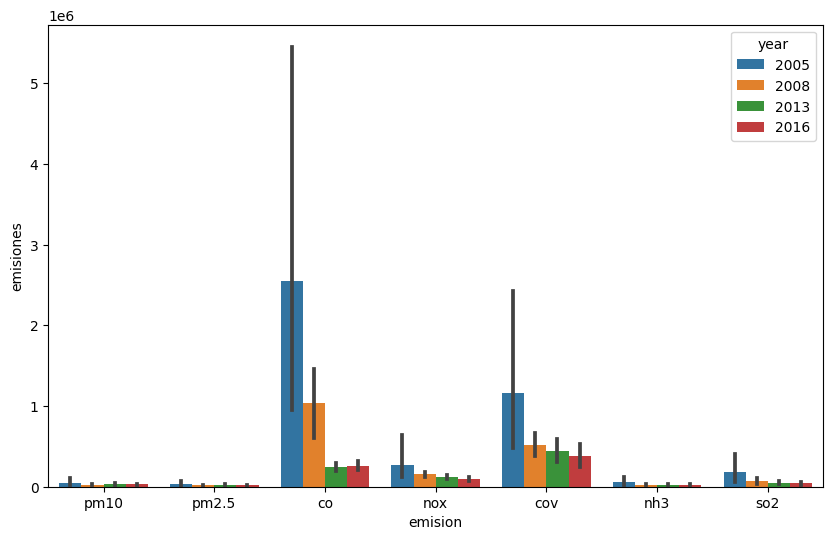

In [306]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="emision", y="emisiones", hue="year", data=total_ent, ax=ax)

plt.show()